In [1]:
from typing import TypedDict 
from langgraph.graph import StateGraph,START,END

In [2]:
class AgentState(TypedDict):
    number1:int
    number2:int
    number3:int
    number4:int
    operation1:str
    operation2:str
    finalnumber1:int
    finalnumber2:int


In [17]:
def adder(state:AgentState) ->AgentState:
   """This node adds the 2 numbers"""
   state["finalnumber1"]=state["number1"]+state["number2"]
   return state

def subtractor(state:AgentState) -> AgentState:
   """This node subtract the 2 numbers"""
   state["finalnumber1"]=state["number1"]-state["number2"]
   return state

def adder_2(state:AgentState) ->AgentState:
   """This node adds the 2 numbers"""
   state["finalnumber2"]=state["number3"]+state["number4"]
   return state

def subtractor_2(state:AgentState) -> AgentState:
   """This node subtract the 2 numbers"""
   state["finalnumber2"]=state["number3"]-state["number4"]
   return state

def decide_next_node(state:AgentState) -> AgentState:
   """This node will select the next node of the graph """

   if state["operation1"]=="+":
      return "addition_operation"
   
   elif state["operation1"]=="-":
      return "subtraction_operation"
   
def decide_next_node_2(state:AgentState) -> AgentState:
   """This node will select the next node of the graph """

   if state["operation2"]=="+":
      return "addition_operation2"
   
   elif state["operation2"]=="-":
      return "subtraction_operation2"

      
   
  
      
   
  

In [18]:
graph=StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state:state)

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }

)

graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")


graph.add_node("add_node2",adder_2)
graph.add_node("subtract_node2",subtractor_2)
graph.add_node("router2",lambda state:state)


graph.add_conditional_edges(
    "router2",
    decide_next_node_2,
    {
        "addition_operation2":"add_node2",
        "subtraction_operation2":"subtract_node2"
    }

)

graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)


app=graph.compile()





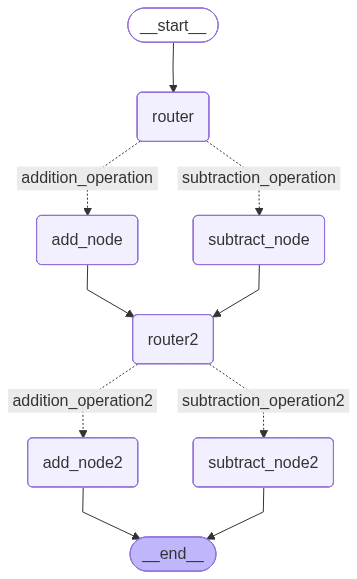

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
initial_state_1=AgentState(number1=10,operation1="-",number2=4,finalnumber1=0,number3=20,operation2="+",number4=5,finalnumber2=0)
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 4, 'number3': 20, 'number4': 5, 'operation1': '-', 'operation2': '+', 'finalnumber1': 6, 'finalnumber2': 25}
